## 1. Time Series Analysis
    1.1 Breakdown by Day of Week

1.1.1 Average Transaction Volume by Day of Week

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
tempdf = pd.read_parquet('data/Transactions_Cleaned.parquet')

print("DataFrame loaded successfully!")
print(f"Shape of loaded DataFrame: {tempdf.shape}")
print("\nData Types:")
print(tempdf.info())

DataFrame loaded successfully!
Shape of loaded DataFrame: (984247, 11)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984247 entries, 0 to 984246
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            984247 non-null  object        
 1   CustomerID               984247 non-null  object        
 2   CustomerDOB              984247 non-null  datetime64[ns]
 3   CustGender               984247 non-null  object        
 4   CustLocation             984247 non-null  object        
 5   CustAccountBalance       984247 non-null  float64       
 6   TransactionDate          984247 non-null  datetime64[ns]
 7   TransactionTime          984247 non-null  object        
 8   TransactionAmount (INR)  984247 non-null  float64       
 9   Age                      984247 non-null  int64         
 10  age_group                984247 non-null  category      

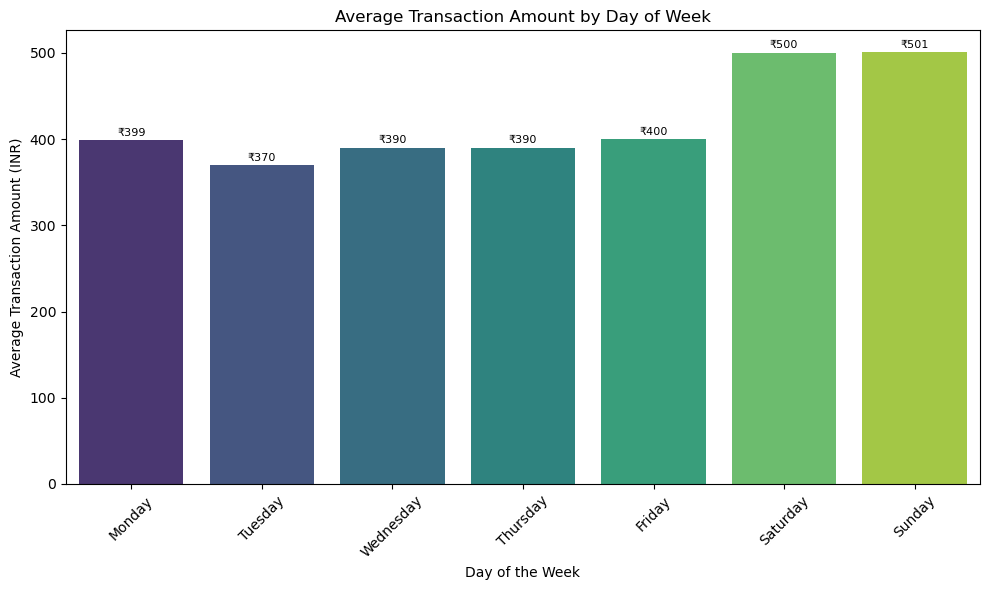

In [19]:
tempdf['TransactionDate'] = pd.to_datetime(tempdf['TransactionDate'])
tempdf['DayOfWeek'] = tempdf['TransactionDate'].dt.day_name()

avg_by_day = tempdf.groupby('DayOfWeek')['TransactionAmount (INR)'].median().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_day['DayOfWeek'] = pd.Categorical(avg_by_day['DayOfWeek'], categories=day_order, ordered=True)
avg_by_day = avg_by_day.sort_values('DayOfWeek')

plt.figure(figsize=(10,6))
ax = sns.barplot(data=avg_by_day, x='DayOfWeek', y='TransactionAmount (INR)', hue='DayOfWeek', palette='viridis', legend=False)

plt.title("Average Transaction Amount by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Transaction Amount (INR)")
plt.xticks(rotation=45)

from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

for p in ax.patches:
    height = p.get_height()
    
    ax.text(
        x=p.get_x() + p.get_width() / 2.,
        y=height + 5,
        s=f'₹{int(height):,}',
        ha='center',
        fontsize=8
    )

plt.tight_layout()
plt.show()

1.1.2 Total Transactions by Day of Week

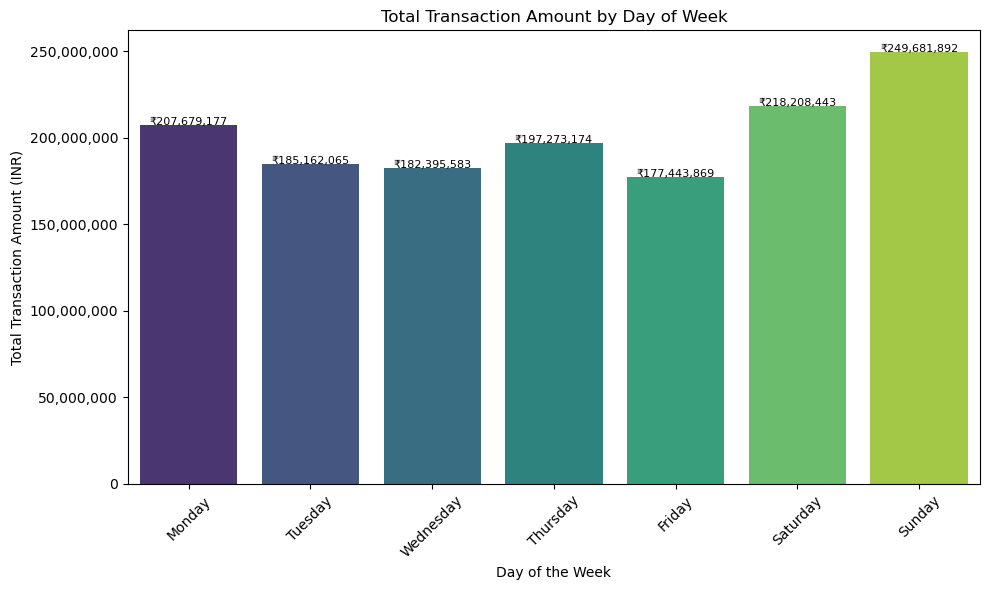

In [24]:
tempdf['TransactionDate'] = pd.to_datetime(tempdf['TransactionDate'])
tempdf['DayOfWeek'] = tempdf['TransactionDate'].dt.day_name()

total_by_day = tempdf.groupby('DayOfWeek')['TransactionAmount (INR)'].sum().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_by_day['DayOfWeek'] = pd.Categorical(total_by_day['DayOfWeek'], categories=day_order, ordered=True)
total_by_day = total_by_day.sort_values('DayOfWeek')

plt.figure(figsize=(10,6))
ax = sns.barplot(data=total_by_day, x='DayOfWeek', y='TransactionAmount (INR)', hue='DayOfWeek', palette='viridis', legend=False)

plt.title("Total Transaction Amount by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Transaction Amount (INR)")
plt.xticks(rotation=45)

from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

for p in ax.patches:
    height = p.get_height()
    
    ax.text(
        x=p.get_x() + p.get_width() / 2.,
        y=height + 5,
        s=f'₹{int(height):,}',
        ha='center',
        fontsize=8
    )

plt.tight_layout()
plt.show()

1.2 Breakdown by Time of Day

1.2.1 Average Transaction Volume by Time of Day

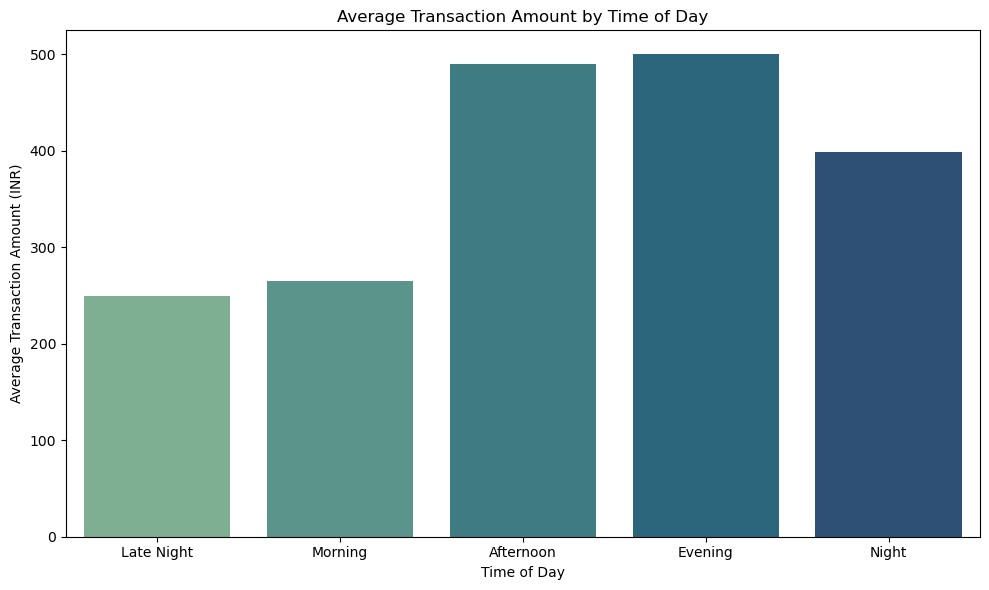

In [29]:
from datetime import time

def get_time_of_day(t):
    if time(5, 0) <= t <= time(11, 59, 59):
        return 'Morning'
    elif time(12, 0) <= t <= time(16, 30, 59):
        return 'Afternoon'
    elif time(16, 31) <= t <= time(21, 30, 59):
        return 'Evening'
    elif time(21, 31) <= t <= time(23, 59, 59):
        return 'Night'
    else:
        return 'Late Night'

tempdf['TimeOfDay'] = tempdf['TransactionTime'].apply(get_time_of_day)

avg_by_time = tempdf.groupby('TimeOfDay')['TransactionAmount (INR)'].median().reset_index()

time_order = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
avg_by_time['TimeOfDay'] = pd.Categorical(avg_by_time['TimeOfDay'], categories=time_order, ordered=True)
avg_by_time = avg_by_time.sort_values('TimeOfDay')

plt.figure(figsize=(10,6))
sns.barplot(data=avg_by_time, x='TimeOfDay', y='TransactionAmount (INR)', hue='TimeOfDay', palette='crest', legend=False)

plt.title("Average Transaction Amount by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Transaction Amount (INR)")

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

1.2.2. Total Transactions by Time of Day

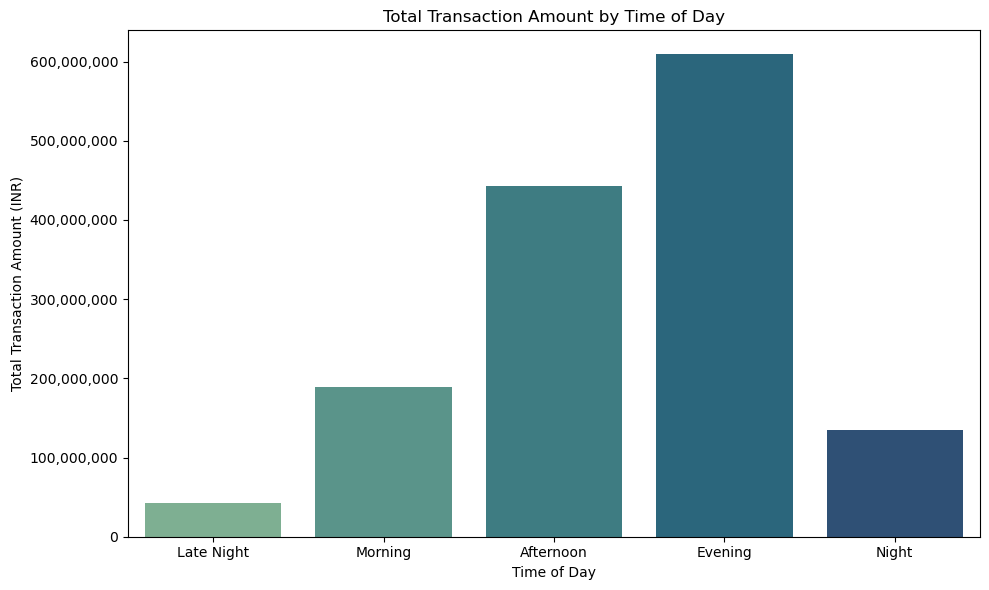

In [31]:
def get_time_of_day(t):
    if time(5, 0) <= t <= time(11, 59, 59):
        return 'Morning'
    elif time(12, 0) <= t <= time(16, 30, 59):
        return 'Afternoon'
    elif time(16, 31) <= t <= time(21, 30, 59):
        return 'Evening'
    elif time(21, 31) <= t <= time(23, 59, 59):
        return 'Night'
    else:
        return 'Late Night'

tempdf['TimeOfDay'] = tempdf['TransactionTime'].apply(get_time_of_day)

total_by_time = tempdf.groupby('TimeOfDay')['TransactionAmount (INR)'].sum().reset_index()

time_order = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
total_by_time['TimeOfDay'] = pd.Categorical(total_by_time['TimeOfDay'], categories=time_order, ordered=True)
avtotal_by_time = total_by_time.sort_values('TimeOfDay')

plt.figure(figsize=(10,6))
sns.barplot(data=total_by_time, x='TimeOfDay', y='TransactionAmount (INR)', hue='TimeOfDay', palette='crest', legend=False)

plt.title("Total Transaction Amount by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Transaction Amount (INR)")

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

1.2.3 Transaction Volume over Time (August 1, 2016 - October 21, 2016)

    NOTE: There is missing data for transactions between 1st October to 20th October. As a result, those dates will not be left out of the range to avoid misinterpretation of data.

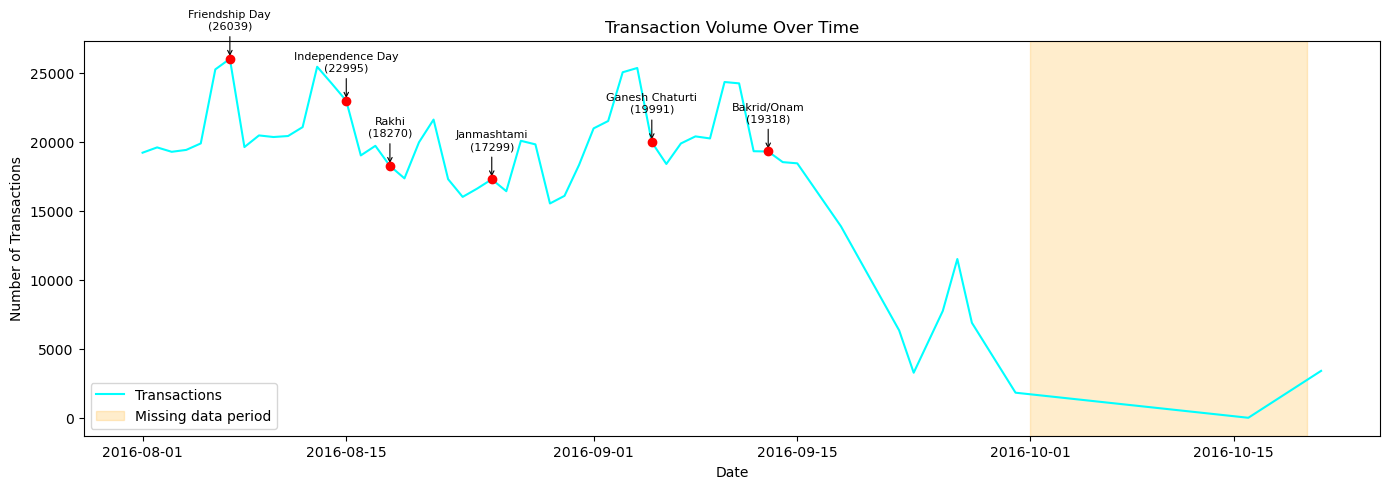

In [13]:
counts = tempdf['TransactionDate'].value_counts().sort_index()

plt.figure(figsize=(14, 5))
plt.plot(counts.index, counts.values, label='Transactions', color='cyan')

holiday_labels = {
    '2016-08-07': 'Friendship Day', '2016-08-15': 'Independence Day', '2016-08-18': 'Rakhi',
    '2016-08-25': 'Janmashtami', '2016-09-05': 'Ganesh Chaturti', '2016-09-13': 'Bakrid/Onam',
}

holiday_dates = pd.to_datetime(list(holiday_labels.keys()))

for date in holiday_dates:
    if date in counts.index: 
        y_val = counts.loc[date]
        label = holiday_labels[date.strftime('%Y-%m-%d')]
        display_text = f"{label}\n({y_val})"

        plt.scatter(date, y_val, color='red', zorder=5)
        plt.annotate(
            display_text,
            xy=(date, y_val), 
            xytext=(0, 20),
            textcoords='offset points',
            ha='center', va='bottom',
            arrowprops=dict(arrowstyle="->", color='black', lw=0.8),
            fontsize=8
        )

start_missing = pd.Timestamp('2016-10-01')
end_missing = pd.Timestamp('2016-10-20')
plt.axvspan(start_missing, end_missing, color='orange', alpha=0.2, label='Missing data period')

plt.title("Transaction Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.legend()
plt.tight_layout()
plt.show()

1.2.4 Average Transaction Amount over Time (August 1, 2016 - October 21, 2016)

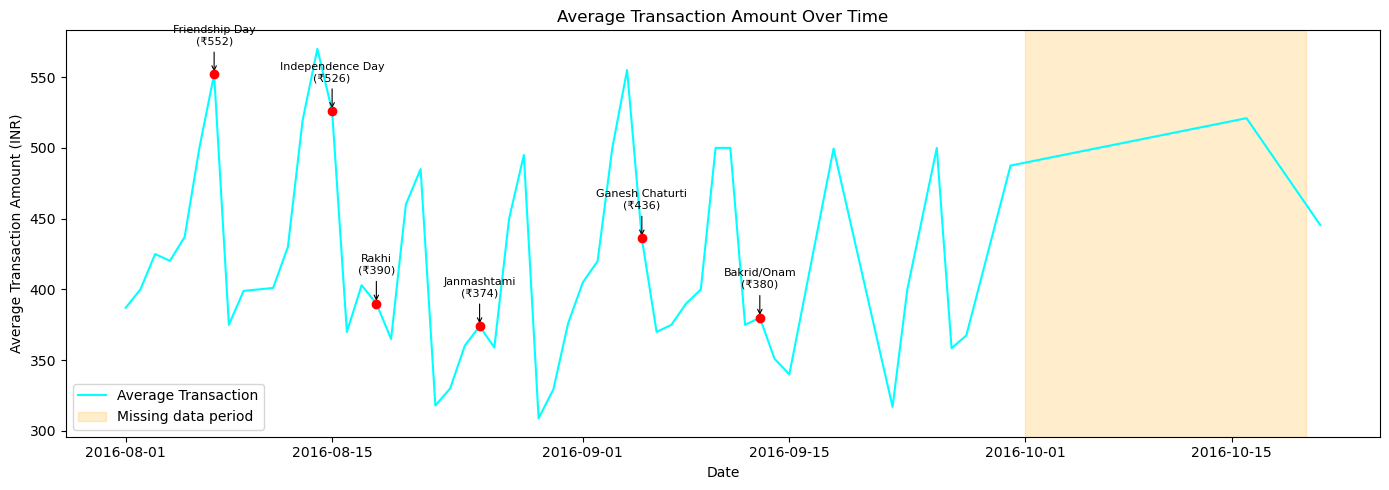

In [14]:
txn_by_date = tempdf.groupby('TransactionDate')['TransactionAmount (INR)'].median().sort_index()

plt.figure(figsize=(14, 5))
plt.plot(txn_by_date.index, txn_by_date.values, label='Average Transaction', color='cyan')

holiday_labels = {
    '2016-08-07': 'Friendship Day', '2016-08-15': 'Independence Day', '2016-08-18': 'Rakhi',
    '2016-08-25': 'Janmashtami', '2016-09-05': 'Ganesh Chaturti', '2016-09-13': 'Bakrid/Onam',
}
holiday_dates = pd.to_datetime(list(holiday_labels.keys()))

for date in holiday_dates:
    if date in txn_by_date.index:
        y_val = txn_by_date.loc[date]
        label = holiday_labels[date.strftime('%Y-%m-%d')]
        display_text = f"{label}\n(₹{y_val:,.0f})"
        
        plt.scatter(date, y_val, color='red', zorder=5)
        plt.annotate(
            display_text,
            xy=(date, y_val),
            xytext=(0, 20),
            textcoords='offset points',
            ha='center', va='bottom',
            arrowprops=dict(arrowstyle="->", color='black', lw=0.8),
            fontsize=8
        )

start_missing = pd.Timestamp('2016-10-01')
end_missing = pd.Timestamp('2016-10-20')
plt.axvspan(start_missing, end_missing, color='orange', alpha=0.2, label='Missing data period')

plt.title("Average Transaction Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Average Transaction Amount (INR)")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend()
plt.tight_layout()
plt.show()